# **Book Recommendation System using Machine learning K Nearest Neighbor.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
book_csv='/content/drive/My Drive/BX-Books.csv'
user_csv='/content/drive/My Drive/BX-Users.csv'
ratings_csv='/content/drive/My Drive/BX-Book-Ratings.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv(book_csv, sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv(user_csv, sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv(ratings_csv, sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

print(ratings.shape)
print(list(ratings.columns))

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:27

(1149780, 3)
['userID', 'ISBN', 'bookRating']


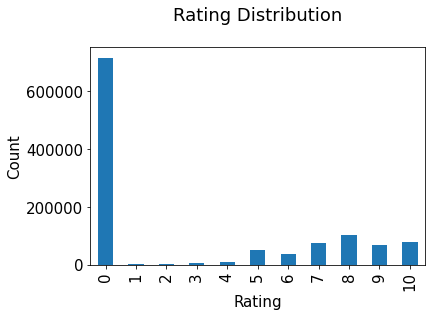

In [ ]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [ ]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['userID', 'Location', 'Age']


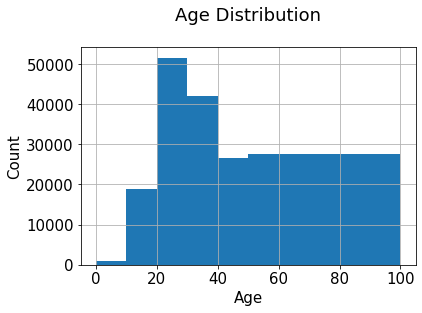

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [ ]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.head())

   userID  ...                                          bookTitle
0  277427  ...  Politically Correct Bedtime Stories: Modern Ta...
1    3363  ...  Politically Correct Bedtime Stories: Modern Ta...
2   11676  ...  Politically Correct Bedtime Stories: Modern Ta...
3   12538  ...  Politically Correct Bedtime Stories: Modern Ta...
4   13552  ...  Politically Correct Bedtime Stories: Modern Ta...

[5 rows x 4 columns]


In [ ]:
combine_book_rating_new = pd.merge(ratings, books, on='ISBN')
print(combine_book_rating_new.head())

   userID  ...                                          imageUrlL
0  277427  ...  http://images.amazon.com/images/P/002542730X.0...
1    3363  ...  http://images.amazon.com/images/P/002542730X.0...
2   11676  ...  http://images.amazon.com/images/P/002542730X.0...
3   12538  ...  http://images.amazon.com/images/P/002542730X.0...
4   13552  ...  http://images.amazon.com/images/P/002542730X.0...

[5 rows x 10 columns]


In [ ]:
combine_book_rating.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle'], dtype='object')

In [ ]:
combine_book_rating_new.columns                                                    

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM',
       'imageUrlL'],
      dtype='object')

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
print(book_ratingCount.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


In [ ]:
combine_book_rating_new = combine_book_rating_new.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount_new = (combine_book_rating_new.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
print(book_ratingCount_new.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


In [ ]:
book_ratingCount.columns

Index(['bookTitle', 'totalRatingCount'], dtype='object')

In [ ]:
book_ratingCount_new.columns

Index(['bookTitle', 'totalRatingCount'], dtype='object')

In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

   userID  ... totalRatingCount
0  277427  ...               82
1    3363  ...               82
2   11676  ...               82
3   12538  ...               82
4   13552  ...               82

[5 rows x 5 columns]
count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [ ]:
rating_with_totalRatingCount.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'totalRatingCount'], dtype='object')

In [ ]:
rating_with_totalRatingCount_new = combine_book_rating_new.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount_new.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount_new['totalRatingCount'].describe())

   userID  ... totalRatingCount
0  277427  ...               82
1    3363  ...               82
2   11676  ...               82
3   12538  ...               82
4   13552  ...               82

[5 rows x 11 columns]
count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [ ]:
rating_with_totalRatingCount_new.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL',
       'totalRatingCount'],
      dtype='object')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount_new['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [ ]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [ ]:
print(book_ratingCount_new['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book.head())

   userID  ... totalRatingCount
0  277427  ...               82
1    3363  ...               82
2   11676  ...               82
3   12538  ...               82
4   13552  ...               82

[5 rows x 5 columns]


In [ ]:
popularity_threshold = 50
rating_popular_book_new = rating_with_totalRatingCount_new.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book_new.head())

   userID  ... totalRatingCount
0  277427  ...               82
1    3363  ...               82
2   11676  ...               82
3   12538  ...               82
4   13552  ...               82

[5 rows x 11 columns]


In [ ]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())

   userID        ISBN  ...  totalRatingCount                       Location
0  277427  002542730X  ...                82          gilbert, arizona, usa
1    3363  002542730X  ...                82      knoxville, tennessee, usa
3   12538  002542730X  ...                82          byron, minnesota, usa
4   13552  002542730X  ...                82        cordova, tennessee, usa
5   16795  002542730X  ...                82  mechanicsville, maryland, usa

[5 rows x 6 columns]


In [ ]:
combined.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'totalRatingCount',
       'Location', 'Age'],
      dtype='object')

In [ ]:
us_canada_user_rating.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'totalRatingCount',
       'Location'],
      dtype='object')

In [ ]:
combined_new = rating_popular_book_new.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating_new = combined_new[combined_new['Location'].str.contains("usa|canada")]
us_canada_user_rating_new =us_canada_user_rating_new.drop('Age', axis=1)
print(us_canada_user_rating_new.head())

   userID        ISBN  ...  totalRatingCount                       Location
0  277427  002542730X  ...                82          gilbert, arizona, usa
1    3363  002542730X  ...                82      knoxville, tennessee, usa
3   12538  002542730X  ...                82          byron, minnesota, usa
4   13552  002542730X  ...                82        cordova, tennessee, usa
5   16795  002542730X  ...                82  mechanicsville, maryland, usa

[5 rows x 12 columns]


In [ ]:
combined_new.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL',
       'totalRatingCount', 'Location', 'Age'],
      dtype='object')

In [ ]:
us_canada_user_rating_new.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle', 'bookAuthor',
       'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL',
       'totalRatingCount', 'Location'],
      dtype='object')

In [ ]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


In [ ]:
us_canada_user_rating_new = us_canada_user_rating_new.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot_new = us_canada_user_rating_new.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix_new = csr_matrix(us_canada_user_rating_pivot_new.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn_new = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_new.fit(us_canada_user_rating_matrix_new)
print(model_knn_new)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


In [ ]:
us_canada_user_rating.iloc[1,]

userID                                                           3363
ISBN                                                       002542730X
bookRating                                                          0
bookTitle           Politically Correct Bedtime Stories: Modern Ta...
totalRatingCount                                                   82
Location                                    knoxville, tennessee, usa
Name: 1, dtype: object

In [ ]:
us_canada_user_rating_new.iloc[1,]

userID                                                            3363
ISBN                                                        002542730X
bookRating                                                           0
bookTitle            Politically Correct Bedtime Stories: Modern Ta...
bookAuthor                                           James Finn Garner
yearOfPublication                                                 1994
publisher                                    John Wiley &amp; Sons Inc
imageUrlS            http://images.amazon.com/images/P/002542730X.0...
imageUrlM            http://images.amazon.com/images/P/002542730X.0...
imageUrlL            http://images.amazon.com/images/P/002542730X.0...
totalRatingCount                                                    82
Location                                     knoxville, tennessee, usa
Name: 1, dtype: object

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 7)
us_canada_user_rating_pivot.index[query_index]

186
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0. 

'Eyes of Prey'

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot_new.shape[0])
print(query_index)
print(us_canada_user_rating_pivot_new.iloc[query_index,:].values.reshape(1,-1))
distances_new, indices_new = model_knn.kneighbors(us_canada_user_rating_pivot_new.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot_new.index[query_index]

342
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0. 

'Mind Prey'

In [ ]:
distances

array([[0.        , 0.70144177, 0.71567087, 0.72951382, 0.7396008 ,
        0.74122748]])

In [ ]:
us_canada_user_rating_new.iloc[100,3]

'The Poisonwood Bible: A Novel'

In [ ]:
us_canada_user_rating.iloc[100,3]

'The Poisonwood Bible: A Novel'

In [ ]:
us_canada_user_rating_pivot.index[375]

'Now You See Her'

In [ ]:
us_canada_user_rating_new.sort_values(by='bookTitle', inplace=True)

In [ ]:
us_canada_user_rating_new.drop_duplicates(subset ="bookTitle", inplace=True)

In [ ]:
us_canada_user_rating_new.iloc[375,3]

'Now You See Her'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Eyes of Prey:

1: Shadow Prey, with distance of 0.39821903398962655:
2: Rules of Prey, with distance of 0.4728871268021073:
3: Night Prey, with distance of 0.500979258484711:
4: All That Remains (Kay Scarpetta Mysteries (Paperback)), with distance of 0.6056840165099999:
5: Body of Evidence (Kay Scarpetta Mysteries (Paperback)), with distance of 0.6967029712963007:
6: Sudden Prey, with distance of 0.7048217650891347:


In [ ]:
# save the data
import pickle

with open('booksmodel.pkl', 'wb') as f:
    pickle.dump(model_knn, f)

In [ ]:
from google.colab import files
files.download("booksmodel.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('booksmodelnew.pkl', 'wb') as f:
    pickle.dump(us_canada_user_rating_new, f)

In [ ]:
files.download("booksmodelnew.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
a = us_canada_user_rating_new.iloc[100]

In [ ]:
a.imageUrlL

'http://images.amazon.com/images/P/0590430033.01.LZZZZZZZ.jpg'

In [ ]:
us_canada_user_rating_pivot

In [ ]:
with open('pivot.pkl', 'wb') as f:
    pickle.dump(us_canada_user_rating_pivot, f)

In [ ]:
files.download("pivot.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
us_canada_user_rating_pivot.index[indices.flatten()[0]]

'A Darkness More Than Night'